In [1]:
from GaussianBernoulliRBM import GaussianBernoulliRBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import sklearn
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
from sklearn.preprocessing import StandardScaler
train_data = mnist_data.train_data.numpy().astype(np.float64)
train_data = train_data.reshape(train_data.shape[0] , -1)

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
train_data = train_data.reshape(train_data.shape[0],28,28)

In [5]:
#Normalizing the training data so that we can train our gaussian BernoulliRBM
mnist_data.train_data = torch.from_numpy(train_data).type(torch.FloatTensor)

print(mnist_data.train_data.shape)

torch.Size([60000, 28, 28])


The number shown is the number: 2


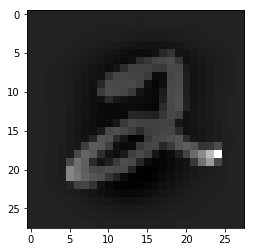

In [6]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [7]:
# If we train on the whole set we expect it to learn to detect edges.
batch_size= 10
tensor_x = mnist_data.train_data.type(torch.FloatTensor) # transform to torch tensors
tensor_y = mnist_data.train_labels.type(torch.FloatTensor)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = torch.utils.data.DataLoader(_dataset,
                    batch_size=batch_size, shuffle=True,drop_last = True)

In [11]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.001
learning_rate_decay = True
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = GaussianBernoulliRBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)

In [12]:
epochs = 1

rbm_mnist.train(train_loader , epochs,batch_size)

RBM fitting: 6000it [00:40, 148.32it/s]
Epoch:1 ,avg_cost = 6.957428932189941 ,std_cost = 10.17129135131836 ,avg_grad = 43993.421875 ,std_grad = 3985.47509765625


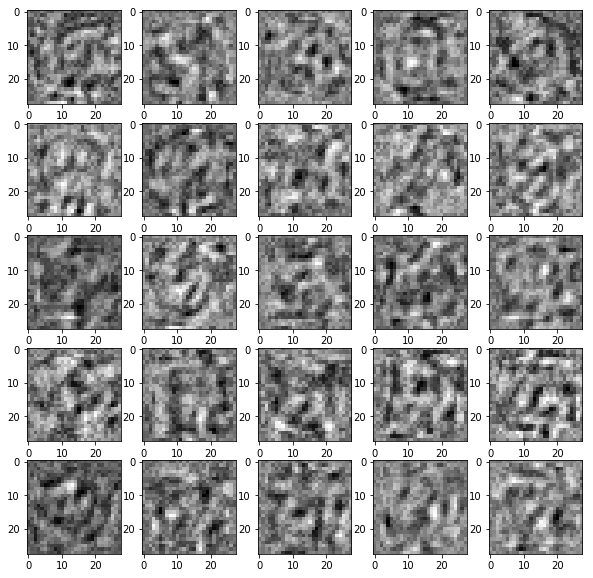

In [13]:
learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()